# [0] Importing Libraries

In [1]:
import numpy as np
import pandas as pd
!pip install pandas_profiling
import pandas_profiling
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#train test split
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS

#ML models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor



### lets start by making our first step in our project which is :
## [1] Hypothesis Generation



- we need to understand the problem we are solving 
  if we done your hypothesis generation adequately,
  you would have included all the variables present 
  in the dataset in your hypothesis generation.
- as we see the problem is predicting sales of the product
  what is the most important thing that would affect product price ?
  -   for me it is actually : #quality #avaliablity , availablity 
      here means that the product store near me or not? also 
      we can include wheather it is essential product or luxury one.
  - also if there is another variations of it or its the only one i need
  - product weight actually affects the predicting price if it is too heavy 
    it means the people buying it need to have a car which will take us to traffic problems 
    and price of gasoline and benzene at that time.
  - what type of it? is it food or something else ?
  - if it is food what is te nutrition facts? atheletes and body builders dont buy fried chicken 😄
  - packaging of the product and expiry date 
  - weather at the store location if it is too windy and too rainy locations doesn't encorage 
    people to go buy anything 
  - Summer or winter ?


## we can Formulate Null & Alternate Hypothesis as Next Step 
   - ### Null Hypothesis means simply nothing new we all already know that
   - ### Alternate Hypothesis means something needs to be tested
        - NULL : quality of product  
            - Alternate : availablity
        - NULL : packaging of product  
            - Alternate : weight of product
        - NULL : nutrition facts 
            - Alternate : summer or winter
   - ### we will pass through all of this by our analysis
        
        

## [2] Loading the Packages

In [2]:
train_df = pd.read_csv('../input/bigmart-analysis/Train.csv')
train_df.head()


Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [3]:
test_df= pd.read_csv('../input/bigmart-analysis/Test.csv')
test_df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  
1               Tier 2  Supermarket Type1  
2               Tier 3      Grocery Store  
3               Tier 2  Supermarket Type1  
4               Tier 3  Supermarket Type3

## [3] Data Exploration

In [4]:
# lets now take an overview on our data
train_df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [5]:
# we can also perform a report out of our data
train_df.profile_report(title='Training dataset Report')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

- ### After we overviewed our Data lets visualize the most important features alone.
- ### we can see that our data contains missing values we will handle this later

In [6]:
train_df['Outlet_Establishment_Year'].head()

0    1999
1    2009
2    1999
3    1998
4    1987
Name: Outlet_Establishment_Year, dtype: int64

### after taking an deep overview to our data we can see that there is columns that are less important or useless to us lets identify and construct function to remove them.

In [7]:
train_df['Outlet_Identifier'].head()

0    OUT049
1    OUT018
2    OUT049
3    OUT010
4    OUT013
Name: Outlet_Identifier, dtype: object

### this identifier is unique id for the store it will  not be useful to use it in our data (simply it doesn't have meaning)
  - same as item identifier

In [8]:
train_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [9]:
test_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

### removing Item_Identifier and Outlet_Identifier

In [10]:
train_df = train_df.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
train_df.head()

Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0         9.30          Low Fat         0.016047                  Dairy   
1         5.92          Regular         0.019278            Soft Drinks   
2        17.50          Low Fat         0.016760                   Meat   
3        19.20          Regular         0.000000  Fruits and Vegetables   
4         8.93          Low Fat         0.000000              Household   

   Item_MRP  Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0  249.8092                       1999      Medium               Tier 1   
1   48.2692                       2009      Medium               Tier 3   
2  141.6180                       1999      Medium               Tier 1   
3  182.0950                       1998         NaN               Tier 3   
4   53.8614                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [11]:
test_df = test_df.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
test_df.head()

Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  Item_MRP  \
0       20.750          Low Fat         0.007565  Snack Foods  107.8622   
1        8.300              reg         0.038428        Dairy   87.3198   
2       14.600          Low Fat         0.099575       Others  241.7538   
3        7.315          Low Fat         0.015388  Snack Foods  155.0340   
4          NaN          Regular         0.118599        Dairy  234.2300   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2007         NaN               Tier 2   
2                       1998         NaN               Tier 3   
3                       2007         NaN               Tier 2   
4                       1985      Medium               Tier 3   

         Outlet_Type  
0  Supermarket Type1  
1  Supermarket Type1  
2      Grocery Store  
3  Supermarket Type1  
4  Supermarket Type3

# [4] Basic EDA (Exploratory Data Analysis)

We will explore a Data set and perform the exploratory data analysis. The major topics to be covered are below:

— Handle Missing value
— Removing duplicates
— Outlier Treatment
— Normalizing and Scaling( Numerical Variables)
— Encoding Categorical variables( Dummy Variables)
— Bivariate Analysis

In [12]:
train_df.shape

(8523, 10)

we have 8523 observations and 10 variables (9 training variables and 1 target)

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                6113 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [14]:
train_df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

### Everything is fine except for missing values and zeroes
### lets solve that problem

In [15]:
train_df.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
test_df.isnull().sum()

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

### thats actually very good we have missing values in only 2 categories lets solve them

- first replaca outlet size with mode (the most repeated one)
- for item weight we can replace it with mean (we will try different scenarios)

In [17]:
train_df['Outlet_Size']=train_df['Outlet_Size'].replace(np.nan,train_df['Outlet_Size'].mode().values[0])
test_df['Outlet_Size']=test_df['Outlet_Size'].replace(np.nan,test_df['Outlet_Size'].mode().values[0])

train_df['Outlet_Size'].describe()

count       8523
unique         3
top       Medium
freq        5203
Name: Outlet_Size, dtype: object

In [18]:
train_df['Item_Weight']=train_df['Item_Weight'].replace(np.nan,train_df['Item_Weight'].mean())
test_df['Item_Weight']=test_df['Item_Weight'].replace(np.nan,test_df['Item_Weight'].mean())

train_df['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [19]:
train_df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [20]:
test_df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

Excellent

### lets check for duplicate entries

In [21]:
duplicate=train_df.duplicated()
duplicate_test=test_df.duplicated()

print('train duplicates: '+ str(duplicate.sum()),'test duplicates: '+str(duplicate_test.sum()))
train_df[duplicate]


train duplicates: 0 test duplicates: 0


Empty DataFrame
Columns: [Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []

### excellent we dont have duplicated entries

<AxesSubplot:>

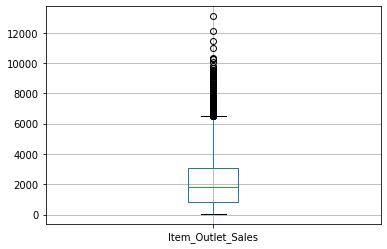

In [22]:

train_df.boxplot(column='Item_Outlet_Sales')

<AxesSubplot:ylabel='Item_Outlet_Sales'>

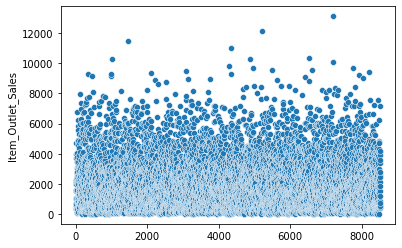

In [23]:
sns.scatterplot(data=train_df,x=train_df.index,y='Item_Outlet_Sales')

In [24]:
def solveOutliers(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    IQR=q3-q1
    lower_range=q1-(1.5*IQR)
    upper_range=q3+(1.5*IQR)
    return lower_range,upper_range

In [25]:
# lowSales,UpSales=solveOutliers(train_df['Item_Outlet_Sales'])
# train_df['Item_Outlet_Sales']=np.where(train_df['Item_Outlet_Sales']>UpSales,UpSales,train_df['Item_Outlet_Sales'])
# train_df['Item_Outlet_Sales']=np.where(train_df['Item_Outlet_Sales']<lowSales,lowSales,train_df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

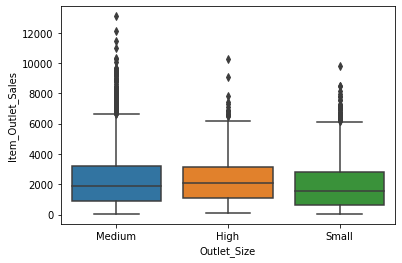

In [26]:
sns.boxplot(data=train_df,x="Outlet_Size",y="Item_Outlet_Sales")

### lets make beutiful visualizations
# [5] Univariat & Bivariat Data visualization

### ohh i found a problem i didnt notice at the beginning that item fats contain duplicate elements of same category (LF,low fat, Low Fat) it doesnt make sense will fix that in a moment

In [27]:
train_df =  train_df.replace(to_replace ="low fat",  value ="Low Fat") 
train_df =  train_df.replace(to_replace ="LF",  value ="Low Fat") 
train_df =  train_df.replace(to_replace ="reg",  value ="Regular") 

test_df =  test_df.replace(to_replace ="low fat",  value ="Low Fat") 
test_df =  test_df.replace(to_replace ="LF",  value ="Low Fat") 
test_df =  test_df.replace(to_replace ="reg",  value ="Regular") 

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

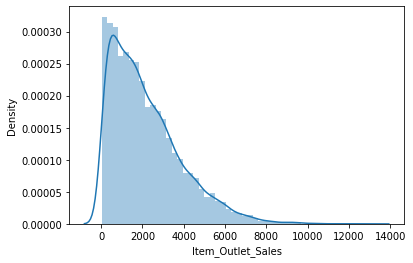

In [28]:
sns.distplot(train_df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Outlet_Establishment_Year'>

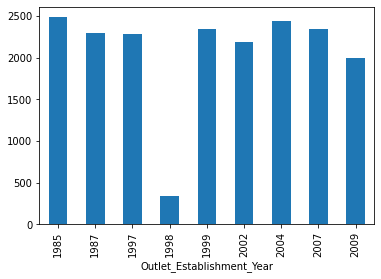

In [29]:
train_df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot.bar()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


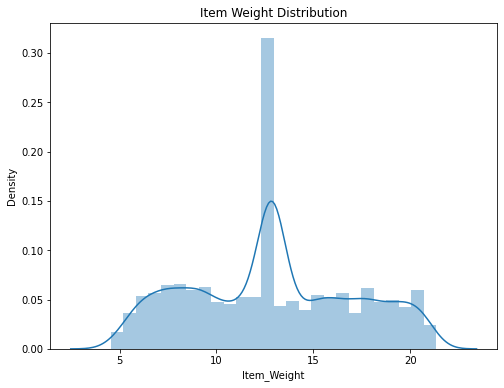

In [30]:
# Item_Weight Distribution
plt.figure(figsize = (8,6))
sns.distplot(train_df['Item_Weight'])
plt.title('Item Weight Distribution')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


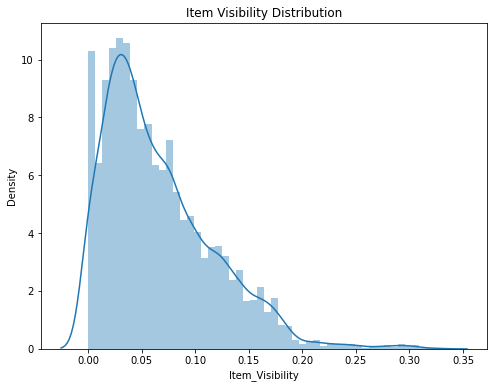

In [31]:
# Item_Visibility Distribution
plt.figure(figsize = (8,6))
sns.distplot(train_df['Item_Visibility'])
plt.title('Item Visibility Distribution')
plt.show()

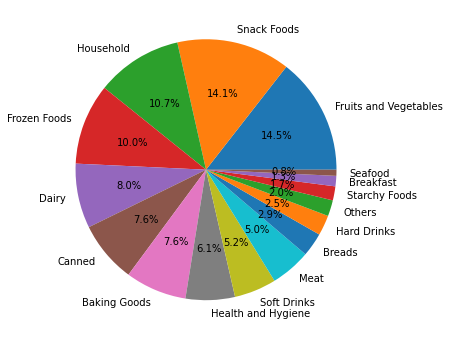

In [32]:
plt.figure(figsize=(6,6))
train_df['Item_Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.show()

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

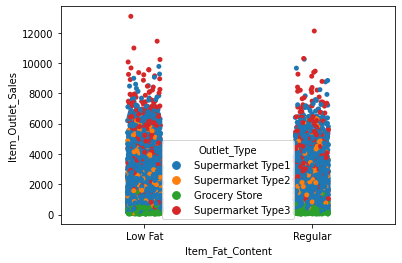

In [33]:
sns.stripplot(data=train_df,x='Item_Fat_Content',y='Item_Outlet_Sales',hue=train_df['Outlet_Type'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

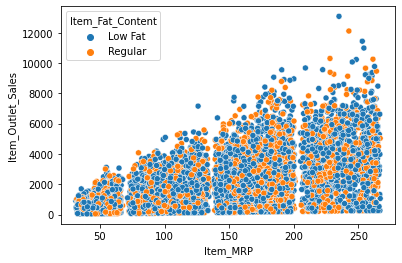

In [34]:
sns.scatterplot(data=train_df,x='Item_MRP',y='Item_Outlet_Sales',hue=train_df['Item_Fat_Content'])

### now this makes sense we can see tat te fat content doesnt really affect the sales price too much

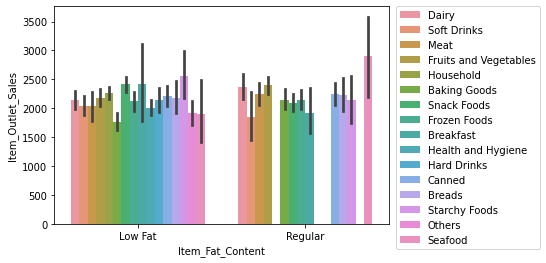

In [35]:

sns.barplot(data=train_df,x='Item_Fat_Content',y='Item_Outlet_Sales',hue=train_df['Item_Type'])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [36]:
category = train_df["Item_Type"].unique()
category

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

### Now, select colors for each category:

In [37]:
colors = [plt.cm.tab10(i/float(len(category)-1)) for i in range(len(category))]
colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0),
 (0.09019607843137255, 0.7450980392156863, 0.8117647

### You can explicitly make a list of the name of your favorite colors. Now we are ready to do the visualization. We will loop through each category and plot them one by one to make a total plot.

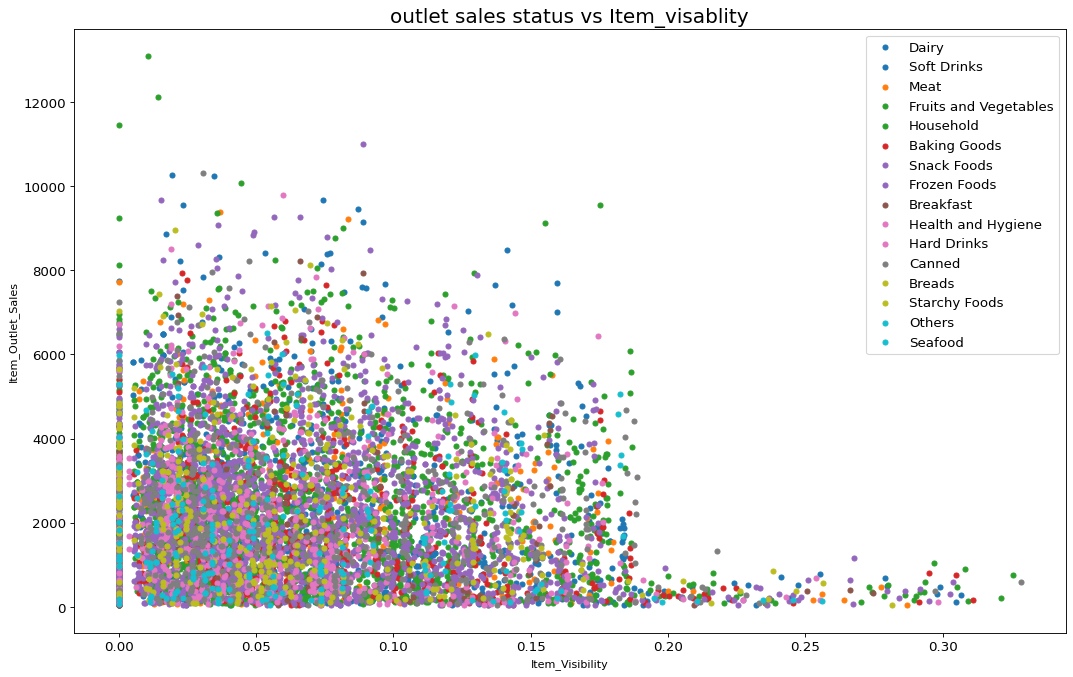

In [38]:
plt.figure(figsize=(16, 10), dpi=80, facecolor="w", edgecolor="k")
for i, cat in enumerate(category):
    plt.scatter("Item_Visibility", "Item_Outlet_Sales",
               data=train_df.loc[train_df.Item_Type == cat, :],
                          s = 20, c=colors[i], label=str(cat))
    
plt.gca().set(xlabel='Item_Visibility',
                 ylabel='Item_Outlet_Sales')
    
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("outlet sales status vs Item_visablity", fontsize=18)
plt.legend(fontsize=12)
plt.show()

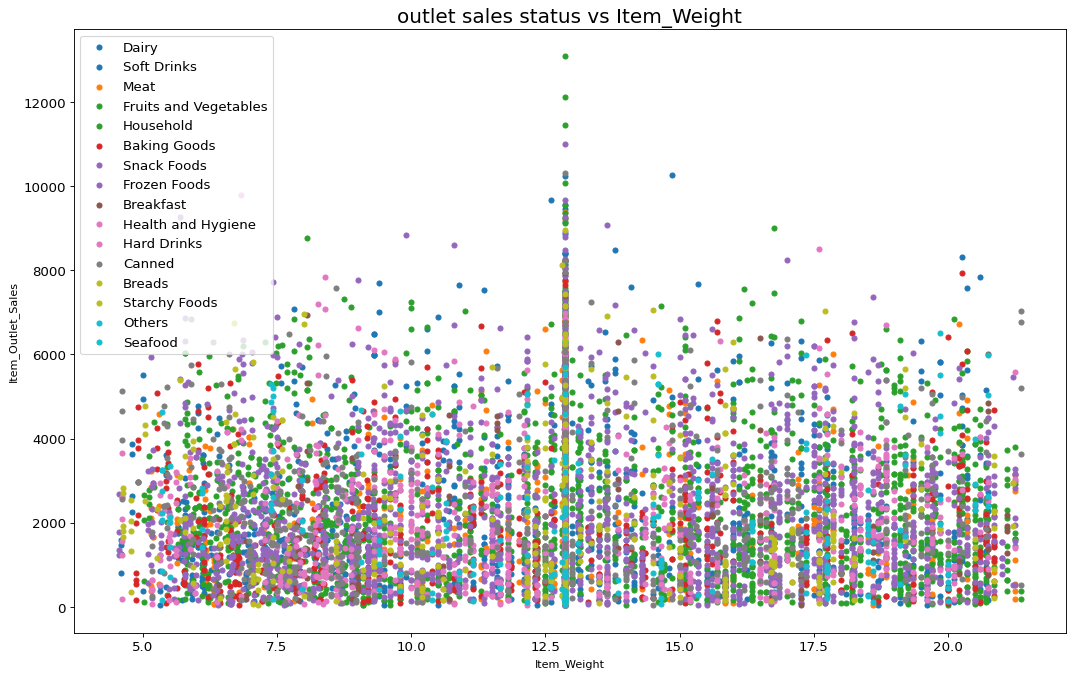

In [39]:
plt.figure(figsize=(16, 10), dpi=80, facecolor="w", edgecolor="k")
for i, cat in enumerate(category):
    plt.scatter("Item_Weight", "Item_Outlet_Sales",
               data=train_df.loc[train_df.Item_Type == cat, :],
                          s = 20, c=colors[i], label=str(cat))
    
plt.gca().set(xlabel='Item_Weight',
                 ylabel='Item_Outlet_Sales')
    
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("outlet sales status vs Item_Weight", fontsize=18)
plt.legend(fontsize=12)
plt.show()

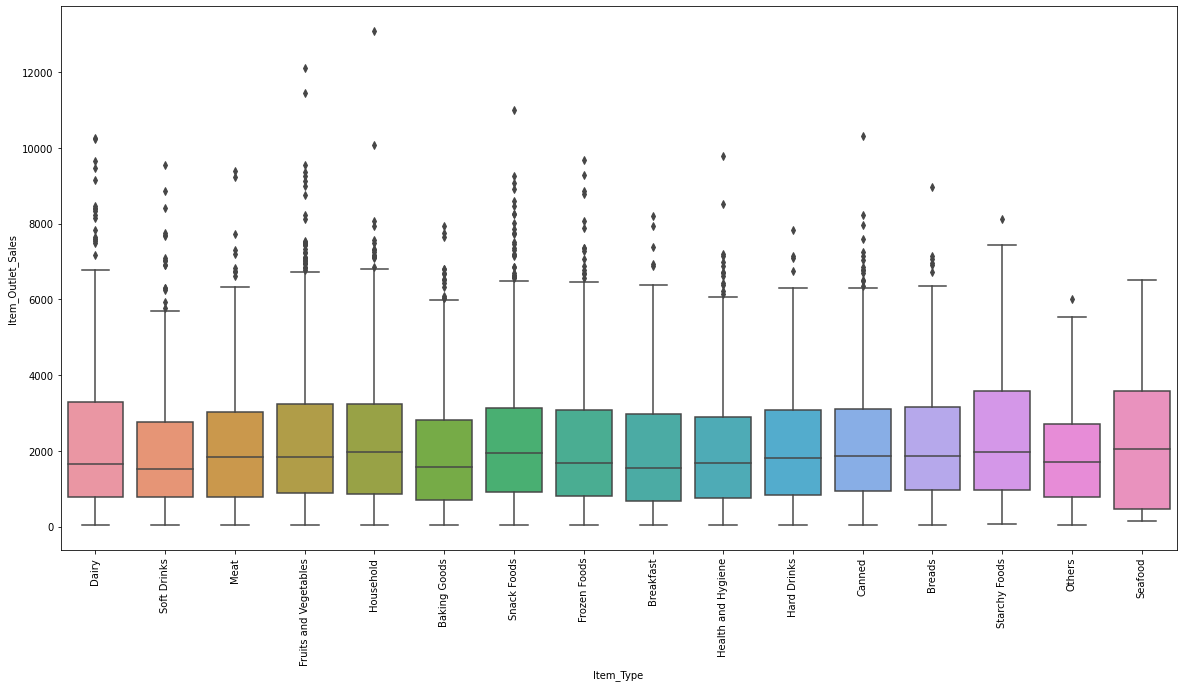

In [40]:
plt.figure(figsize=(20, 10))
fig = sns.boxplot(x='Item_Type', y="Item_Outlet_Sales", data=train_df)
plt.xticks(rotation=90)
plt.show()

# [6 feature Engineering]

### lets see correlation between variables

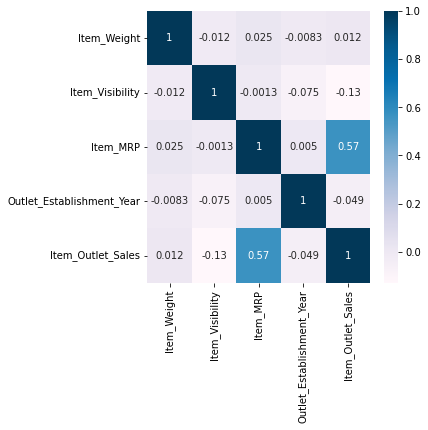

In [41]:
# Set figure size
plt.figure(figsize=(5,5))

# Calculate correlation matrix
cor = train_df.corr() 

# Plot the correlation matrix
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

### we can see that item MPR is highly correlated with item_outlet _sales

In [42]:
train_df.head()

Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0         9.30          Low Fat         0.016047                  Dairy   
1         5.92          Regular         0.019278            Soft Drinks   
2        17.50          Low Fat         0.016760                   Meat   
3        19.20          Regular         0.000000  Fruits and Vegetables   
4         8.93          Low Fat         0.000000              Household   

   Item_MRP  Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0  249.8092                       1999      Medium               Tier 1   
1   48.2692                       2009      Medium               Tier 3   
2  141.6180                       1999      Medium               Tier 1   
3  182.0950                       1998      Medium               Tier 3   
4   53.8614                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

### we can see also outlet establishment year is uselsess but if we convert it to the age of the market it will be very useful

In [43]:
train_df['Age']=2022-train_df['Outlet_Establishment_Year']
test_df['Age']=2022-test_df['Outlet_Establishment_Year']

In [44]:
train_df['Age'].head()

0    23
1    13
2    23
3    24
4    35
Name: Age, dtype: int64

In [45]:
test_df.head()

Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  Item_MRP  \
0    20.750000          Low Fat         0.007565  Snack Foods  107.8622   
1     8.300000          Regular         0.038428        Dairy   87.3198   
2    14.600000          Low Fat         0.099575       Others  241.7538   
3     7.315000          Low Fat         0.015388  Snack Foods  155.0340   
4    12.695633          Regular         0.118599        Dairy  234.2300   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2007      Medium               Tier 2   
2                       1998      Medium               Tier 3   
3                       2007      Medium               Tier 2   
4                       1985      Medium               Tier 3   

         Outlet_Type  Age  
0  Supermarket Type1   23  
1  Supermarket Type1   15  
2      Grocery Store   24  
3  Supermarket Type1   15  
4  Supermarket Type3   37

In [46]:
train_df = train_df.drop(['Outlet_Establishment_Year'],axis=1)
test_df=test_df.drop(['Outlet_Establishment_Year'],axis=1)
train_df.head()

Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0         9.30          Low Fat         0.016047                  Dairy   
1         5.92          Regular         0.019278            Soft Drinks   
2        17.50          Low Fat         0.016760                   Meat   
3        19.20          Regular         0.000000  Fruits and Vegetables   
4         8.93          Low Fat         0.000000              Household   

   Item_MRP Outlet_Size Outlet_Location_Type        Outlet_Type  \
0  249.8092      Medium               Tier 1  Supermarket Type1   
1   48.2692      Medium               Tier 3  Supermarket Type2   
2  141.6180      Medium               Tier 1  Supermarket Type1   
3  182.0950      Medium               Tier 3      Grocery Store   
4   53.8614        High               Tier 3  Supermarket Type1   

   Item_Outlet_Sales  Age  
0          3735.1380   23  
1           443.4228   13  
2          2097.2700   23  
3           732.3800   24  
4           994.7052   35

## Encoding categorical variables

### we have two types of variables:
- Ordinal Data: The categories have an inherent order  [Item_Fat_Content , Outlet_Size,Outlet_Location_Type ]
- Nominal Data: The categories do not have an inherent order [Item_Type, Outlet_Type]

## first One label encoding

In [47]:
df_encoded = train_df.copy() # to keep original dataframe taking copy of it
df_test_encoded=test_df.copy()

In [48]:
le = LabelEncoder()
Label = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

for i in Label:
    df_encoded[i] = le.fit_transform(df_encoded[i])
    df_test_encoded[i] = le.fit_transform(df_test_encoded[i])
    
df_encoded.head()

Item_Weight  Item_Fat_Content  Item_Visibility              Item_Type  \
0         9.30                 0         0.016047                  Dairy   
1         5.92                 1         0.019278            Soft Drinks   
2        17.50                 0         0.016760                   Meat   
3        19.20                 1         0.000000  Fruits and Vegetables   
4         8.93                 0         0.000000              Household   

   Item_MRP  Outlet_Size  Outlet_Location_Type        Outlet_Type  \
0  249.8092            1                     0  Supermarket Type1   
1   48.2692            1                     2  Supermarket Type2   
2  141.6180            1                     0  Supermarket Type1   
3  182.0950            1                     2      Grocery Store   
4   53.8614            0                     2  Supermarket Type1   

   Item_Outlet_Sales  Age  
0          3735.1380   23  
1           443.4228   13  
2          2097.2700   23  
3           732.3800   24  
4           994.7052   35

In [49]:
df_test_encoded.head()

Item_Weight  Item_Fat_Content  Item_Visibility    Item_Type  Item_MRP  \
0    20.750000                 0         0.007565  Snack Foods  107.8622   
1     8.300000                 1         0.038428        Dairy   87.3198   
2    14.600000                 0         0.099575       Others  241.7538   
3     7.315000                 0         0.015388  Snack Foods  155.0340   
4    12.695633                 1         0.118599        Dairy  234.2300   

   Outlet_Size  Outlet_Location_Type        Outlet_Type  Age  
0            1                     0  Supermarket Type1   23  
1            1                     1  Supermarket Type1   15  
2            1                     2      Grocery Store   24  
3            1                     1  Supermarket Type1   15  
4            1                     2  Supermarket Type3   37

## second One-Hot encoding

In [50]:

cols = ['Item_Type','Outlet_Type']
# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
tr_oh = pd.DataFrame(OH_encoder.fit_transform(df_encoded[cols])).astype('int64')
te_oh = pd.DataFrame(OH_encoder.fit_transform(df_test_encoded[cols])).astype('int64')


#get feature columns
tr_oh.columns = OH_encoder.get_feature_names(cols)
te_oh.columns = OH_encoder.get_feature_names(cols)

# One-hot encoding removed index; put it back
tr_oh.index = df_encoded.index
te_oh.index = df_test_encoded.index

# Add one-hot encoded columns to our main df new name: tr_fe, te_fe (means feature engeenired) 
df_encoded = pd.concat([df_encoded, tr_oh], axis=1)
df_test_encoded = pd.concat([df_test_encoded, te_oh], axis=1)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [51]:
df_encoded.head()

Item_Weight  Item_Fat_Content  Item_Visibility              Item_Type  \
0         9.30                 0         0.016047                  Dairy   
1         5.92                 1         0.019278            Soft Drinks   
2        17.50                 0         0.016760                   Meat   
3        19.20                 1         0.000000  Fruits and Vegetables   
4         8.93                 0         0.000000              Household   

   Item_MRP  Outlet_Size  Outlet_Location_Type        Outlet_Type  \
0  249.8092            1                     0  Supermarket Type1   
1   48.2692            1                     2  Supermarket Type2   
2  141.6180            1                     0  Supermarket Type1   
3  182.0950            1                     2      Grocery Store   
4   53.8614            0                     2  Supermarket Type1   

   Item_Outlet_Sales  Age  ...  Item_Type_Meat  Item_Type_Others  \
0          3735.1380   23  ...               0                 0   
1           443.4228   13  ...               0                 0   
2          2097.2700   23  ...               1                 0   
3           732.3800   24  ...               0                 0   
4           994.7052   35  ...               0                 0   

   Item_Type_Seafood  Item_Type_Snack Foods  Item_Type_Soft Drinks  \
0                  0                      0                      0   
1                  0                      0                      1   
2                  0                      0                      0   
3                  0                      0                      0   
4                  0                      0                      0   

   Item_Type_Starchy Foods  Outlet_Type_Grocery Store  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        0                          1   
4                        0                          0   

   Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
0                              1                              0   
1                              0                              1   
2                              1                              0   
3                              0                              0   
4                              1                              0   

   Outlet_Type_Supermarket Type3  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0  

[5 rows x 30 columns]

In [52]:
df_test_encoded.head()

Item_Weight  Item_Fat_Content  Item_Visibility    Item_Type  Item_MRP  \
0    20.750000                 0         0.007565  Snack Foods  107.8622   
1     8.300000                 1         0.038428        Dairy   87.3198   
2    14.600000                 0         0.099575       Others  241.7538   
3     7.315000                 0         0.015388  Snack Foods  155.0340   
4    12.695633                 1         0.118599        Dairy  234.2300   

   Outlet_Size  Outlet_Location_Type        Outlet_Type  Age  \
0            1                     0  Supermarket Type1   23   
1            1                     1  Supermarket Type1   15   
2            1                     2      Grocery Store   24   
3            1                     1  Supermarket Type1   15   
4            1                     2  Supermarket Type3   37   

   Item_Type_Baking Goods  ...  Item_Type_Meat  Item_Type_Others  \
0                       0  ...               0                 0   
1                       0  ...               0                 0   
2                       0  ...               0                 1   
3                       0  ...               0                 0   
4                       0  ...               0                 0   

   Item_Type_Seafood  Item_Type_Snack Foods  Item_Type_Soft Drinks  \
0                  0                      1                      0   
1                  0                      0                      0   
2                  0                      0                      0   
3                  0                      1                      0   
4                  0                      0                      0   

   Item_Type_Starchy Foods  Outlet_Type_Grocery Store  \
0                        0                          0   
1                        0                          0   
2                        0                          1   
3                        0                          0   
4                        0                          0   

   Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
0                              1                              0   
1                              1                              0   
2                              0                              0   
3                              1                              0   
4                              0                              0   

   Outlet_Type_Supermarket Type3  
0                              0  
1                              0  
2                              0  
3                              0  
4                              1  

[5 rows x 29 columns]

In [53]:
# Dropping irrelevant columns
df_encoded  = df_encoded.drop(['Outlet_Type','Item_Type'],axis=1)
df_test_encoded=df_test_encoded.drop(['Outlet_Type','Item_Type'],axis=1)

In [54]:
df_encoded.head()

Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  Outlet_Size  \
0         9.30                 0         0.016047  249.8092            1   
1         5.92                 1         0.019278   48.2692            1   
2        17.50                 0         0.016760  141.6180            1   
3        19.20                 1         0.000000  182.0950            1   
4         8.93                 0         0.000000   53.8614            0   

   Outlet_Location_Type  Item_Outlet_Sales  Age  Item_Type_Baking Goods  \
0                     0          3735.1380   23                       0   
1                     2           443.4228   13                       0   
2                     0          2097.2700   23                       0   
3                     2           732.3800   24                       0   
4                     2           994.7052   35                       0   

   Item_Type_Breads  ...  Item_Type_Meat  Item_Type_Others  Item_Type_Seafood  \
0                 0  ...               0                 0                  0   
1                 0  ...               0                 0                  0   
2                 0  ...               1                 0                  0   
3                 0  ...               0                 0                  0   
4                 0  ...               0                 0                  0   

   Item_Type_Snack Foods  Item_Type_Soft Drinks  Item_Type_Starchy Foods  \
0                      0                      0                        0   
1                      0                      1                        0   
2                      0                      0                        0   
3                      0                      0                        0   
4                      0                      0                        0   

   Outlet_Type_Grocery Store  Outlet_Type_Supermarket Type1  \
0                          0                              1   
1                          0                              0   
2                          0                              1   
3                          1                              0   
4                          0                              1   

   Outlet_Type_Supermarket Type2  Outlet_Type_Supermarket Type3  
0                              0                              0  
1                              1                              0  
2                              0                              0  
3                              0                              0  
4                              0                              0  

[5 rows x 28 columns]

In [55]:
df_test_encoded.head()

Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  Outlet_Size  \
0    20.750000                 0         0.007565  107.8622            1   
1     8.300000                 1         0.038428   87.3198            1   
2    14.600000                 0         0.099575  241.7538            1   
3     7.315000                 0         0.015388  155.0340            1   
4    12.695633                 1         0.118599  234.2300            1   

   Outlet_Location_Type  Age  Item_Type_Baking Goods  Item_Type_Breads  \
0                     0   23                       0                 0   
1                     1   15                       0                 0   
2                     2   24                       0                 0   
3                     1   15                       0                 0   
4                     2   37                       0                 0   

   Item_Type_Breakfast  ...  Item_Type_Meat  Item_Type_Others  \
0                    0  ...               0                 0   
1                    0  ...               0                 0   
2                    0  ...               0                 1   
3                    0  ...               0                 0   
4                    0  ...               0                 0   

   Item_Type_Seafood  Item_Type_Snack Foods  Item_Type_Soft Drinks  \
0                  0                      1                      0   
1                  0                      0                      0   
2                  0                      0                      0   
3                  0                      1                      0   
4                  0                      0                      0   

   Item_Type_Starchy Foods  Outlet_Type_Grocery Store  \
0                        0                          0   
1                        0                          0   
2                        0                          1   
3                        0                          0   
4                        0                          0   

   Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
0                              1                              0   
1                              1                              0   
2                              0                              0   
3                              1                              0   
4                              0                              0   

   Outlet_Type_Supermarket Type3  
0                              0  
1                              0  
2                              0  
3                              0  
4                              1  

[5 rows x 27 columns]

# Finally we are ready for Modeling part
## Hurray !

## [1] Linear Regression

In [56]:
y = df_encoded['Item_Outlet_Sales']
X = df_encoded.drop('Item_Outlet_Sales', axis = 1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.8, random_state = 0)

In [57]:
def cross_val(model_name,model,X,y,cv):
    scores = CVS(model, X, y, cv=cv)
    return round(scores.mean(),4)
    
def evaluate(model_name, model, X, y, y_val, y_predict):
    #score variables
    LR_MAE = round(MAE(y_val, y_predict),2)
    LR_MSE = round(MSE(y_val, y_predict),2)
    LR_R_2 = round(R2(y_val, y_predict),4)
    LR_CS  = round(CVS(model_name, X, y, cv=5).mean(),4)
    score= cross_val(model_name,model,X,y,5)
    return pd.DataFrame([[LR_MAE,LR_MSE,LR_R_2,score]],columns=['Mean Absolute Error','Mean Squared Error','R^2 Score','Score'])



In [58]:
linear_model=LinearRegression(normalize=True)
linear_model.fit(X_train,y_train)
y_predict=linear_model.predict(X_val)

results= evaluate(linear_model,LinearRegression(),X,y,y_val,y_predict)
results.index=['Linear Model']
results


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

Mean Absolute Error  Mean Squared Error  R^2 Score  Score
Linear Model               839.94          1286925.44     0.5589  0.558

## [2] Regularized Linear Regression

-   ## Lasso Regressor

In [59]:
LS = Lasso(alpha = 0.05)
LS.fit(X_train,y_train)
y_predict = LS.predict(X_val)

results_lasso= evaluate(LS,Lasso(alpha = 0.05),X,y,y_val,y_predict)
results_lasso.index=['Regularized LR']

results=results.append(results_lasso)
results.head()


Mean Absolute Error  Mean Squared Error  R^2 Score   Score
Linear Model                 839.94          1286925.44     0.5589  0.5580
Regularized LR               838.07          1285554.86     0.5594  0.5581

## Regularized and normal linear regression are quite the same

## [3] RandomForest

In [60]:
RF_regressor = RandomForestRegressor(n_estimators=200, random_state=0)
RF_regressor.fit(X_train,y_train)
y_predict=RF_regressor.predict(X_val)

results_RF= evaluate(RF_regressor,RandomForestRegressor(),X,y,y_val,y_predict)
results_RF.index=['Random Forest model']

results=results.append(results_RF)
results

Mean Absolute Error  Mean Squared Error  R^2 Score  \
Linear Model                      839.94          1286925.44     0.5589   
Regularized LR                    838.07          1285554.86     0.5594   
Random Forest model               800.91          1325700.02     0.5456   

                      Score  
Linear Model         0.5580  
Regularized LR       0.5581  
Random Forest model  0.5479

## [4] XGB

In [61]:
xgb_regressor=XGBRegressor(n_estimators=500,learning_rate=0.05)
xgb_regressor.fit(X_train,y_train)
xgb_regressor.predict(X_val)

results_xgb= evaluate(xgb_regressor,XGBRegressor(n_estimators=500,learning_rate=0.05),X,y,y_val,y_predict)
results_xgb.index=['XGB model']

results=results.append(results_xgb)
results


Mean Absolute Error  Mean Squared Error  R^2 Score  \
Linear Model                      839.94          1286925.44     0.5589   
Regularized LR                    838.07          1285554.86     0.5594   
Random Forest model               800.91          1325700.02     0.5456   
XGB model                         800.91          1325700.02     0.5456   

                      Score  
Linear Model         0.5580  
Regularized LR       0.5581  
Random Forest model  0.5479  
XGB model            0.5500

# Now lets predict on our testing dataset


In [62]:
y_predict_On_Test_Dataset=pd.DataFrame(LS.predict(df_test_encoded))
y_predict_On_Test_Dataset

0
0     1804.738115
1     1526.094610
2     1969.270514
3     2520.768633
4     5173.207073
...           ...
5676  2320.179192
5677  2272.156815
5678  2051.513878
5679  3488.908353
5680  1345.127743

[5681 rows x 1 columns]

In [63]:
y_predict_On_Test_Dataset.columns=['predicted Sales']

In [64]:
test_df=pd.concat([test_df,y_predict_On_Test_Dataset],axis=1)
test_df

Item_Weight Item_Fat_Content  Item_Visibility           Item_Type  \
0       20.750000          Low Fat         0.007565         Snack Foods   
1        8.300000          Regular         0.038428               Dairy   
2       14.600000          Low Fat         0.099575              Others   
3        7.315000          Low Fat         0.015388         Snack Foods   
4       12.695633          Regular         0.118599               Dairy   
...           ...              ...              ...                 ...   
5676    10.500000          Regular         0.013496         Snack Foods   
5677     7.600000          Regular         0.142991       Starchy Foods   
5678    10.000000          Low Fat         0.073529  Health and Hygiene   
5679    15.300000          Regular         0.000000              Canned   
5680     9.500000          Regular         0.104720              Canned   

      Item_MRP Outlet_Size Outlet_Location_Type        Outlet_Type  Age  \
0     107.8622      Medium               Tier 1  Supermarket Type1   23   
1      87.3198      Medium               Tier 2  Supermarket Type1   15   
2     241.7538      Medium               Tier 3      Grocery Store   24   
3     155.0340      Medium               Tier 2  Supermarket Type1   15   
4     234.2300      Medium               Tier 3  Supermarket Type3   37   
...        ...         ...                  ...                ...  ...   
5676  141.3154       Small               Tier 1  Supermarket Type1   25   
5677  169.1448      Medium               Tier 3  Supermarket Type2   13   
5678  118.7440      Medium               Tier 2  Supermarket Type1   20   
5679  214.6218      Medium               Tier 2  Supermarket Type1   15   
5680   79.7960      Medium               Tier 2  Supermarket Type1   20   

      predicted Sales  
0         1804.738115  
1         1526.094610  
2         1969.270514  
3         2520.768633  
4         5173.207073  
...               ...  
5676      2320.179192  
5677      2272.156815  
5678      2051.513878  
5679      3488.908353  
5680      1345.127743  

[5681 rows x 10 columns]